In [1]:
import requests
import cv2
from glob import glob
import os
import torch
import torch.nn as nn
import ultralytics
import numpy as np
from ultralytics import YOLO

from ultralytics.nn.tasks import DetectionModel
from ultralytics.engine.model import Model

import matplotlib.pyplot as plt

from plotimages import yolo2bbox, plot_box, plot

In [2]:
ultralytics.checks()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
CUDA_VERSION = torch.version.cuda if DEVICE == "cuda" else "-"
print(f"Device: {DEVICE}. CUDA version: {CUDA_VERSION}.")

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Setup complete ✅ (24 CPUs, 125.6 GB RAM, 15.0/25.0 GB disk)
Device: cuda. CUDA version: 12.1.


['0']
['0']
['0']
['0']


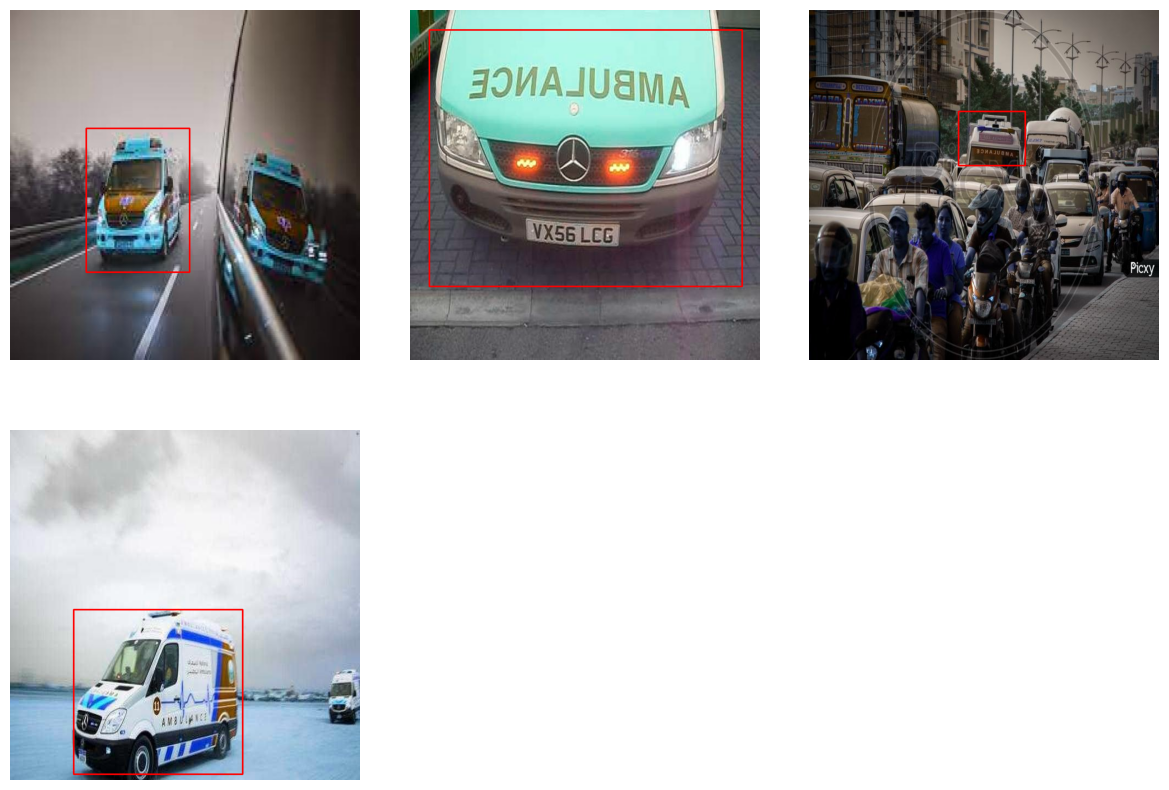

In [3]:
plot("datasets/ambulance-dataset/images/train", "datasets/ambulance-dataset/images/labels/train", 4)

In [4]:
!ls datasets/ambulance-dataset/images/train -1 | wc -l
!ls datasets/ambulance-dataset/labels/train -1 | wc -l
!ls datasets/ambulance-dataset/images/val -1 | wc -l
!ls datasets/ambulance-dataset/labels/val -1 | wc -l

525
525
58
58


In [26]:
yolo = YOLO(model="runs/detect/yolov8_truck_12/weights/best.pt")

In [ ]:
results = yolo.train(
    data = "truck-dataset.yaml",
    imgsz = 320 * 2,
    epochs = 3,
    batch = 32,
    name = "yolov8_truck_1",
    freeze = 19,
    # resume = True,
    save = True,
    save_dir="YOLOv8/",
    lr0=0.00001,
    lrf=0.6,
    optimizer="Adam",
    plots=True,
)

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/yolov8_truck_12/weights/best.pt, data=truck-dataset.yaml, epochs=3, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_truck_13, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=19, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

train: Scanning /root/yolo/datasets/truck-dataset/labels/train.cache... 6022 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6022/6022 [00:00<?, ?it/s]
val: Scanning /root/yolo/datasets/truck-dataset/labels/val.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_truck_13/labels.jpg... 
optimizer: Adam(lr=1e-05, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8_truck_13
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      3.24G      1.012      1.102      1.219         19        640: 100%|██████████| 189/189 [00:43<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        250        414      0.611      0.582      0.629      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3       2.7G     0.9691      1.057      1.202        105        640:  54%|█████▍    | 102/189 [00:23<00:19,  4.48it/s]

In [14]:
results = yolo(glob("datasets/truck-dataset/images/val/*.jpg")[210:220])


0: 320x320 (no detections), 1: 320x320 2 trucks, 2: 320x320 (no detections), 3: 320x320 (no detections), 4: 320x320 2 trucks, 5: 320x320 1 truck, 6: 320x320 (no detections), 7: 320x320 2 trucks, 8: 320x320 (no detections), 9: 320x320 4 trucks, 20.3ms
Speed: 0.4ms preprocess, 2.0ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 320)


In [15]:
savefolder = "runs/detect/results1/"
for i in range(10):
    filename = f"result_{i}.jpg"
    results[i].save(f"{savefolder}{filename}")

In [9]:
yolo2 = YOLO(model="yolov8m.pt")

In [ ]:
yolo2.val(
    data = "truck-dataset.yaml",
)